# Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
bike = pd.read_csv("D:/ML Assignments/Bike Rental Assignment/Bike.csv") 

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Removing redundant & unwanted columns¶

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.



In [8]:
bike_new = bike.drop(["instant","dteday","casual","registered"], axis = 1)

In [9]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_new["season"] = bike_new["season"].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_new["yr"] = bike_new["yr"].replace({0:'2018',1:'2019'})
bike_new["mnth"] = bike_new["mnth"].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_new["holiday"] = bike_new["holiday"].replace({0:'No Holiday',1:'Holiday'})
bike_new["weekday"] = bike_new["weekday"].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bike_new["workingday"] = bike_new['workingday'].replace({0:'workingday',1:'Holiday_w'})
bike_new["weathersit"] = bike_new['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})

In [11]:
bike_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Thu,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,No Holiday,Fri,Holiday_w,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,No Holiday,Sat,Holiday_w,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,No Holiday,Sun,workingday,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,No Holiday,Mon,workingday,Clear,10.489153,11.58500,48.3333,23.500518,1796


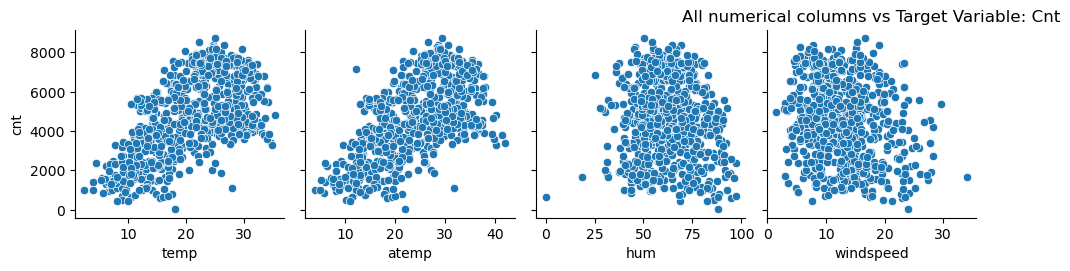

In [12]:
sns.pairplot(bike_new,x_vars=["temp", "atemp", "hum",'windspeed'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

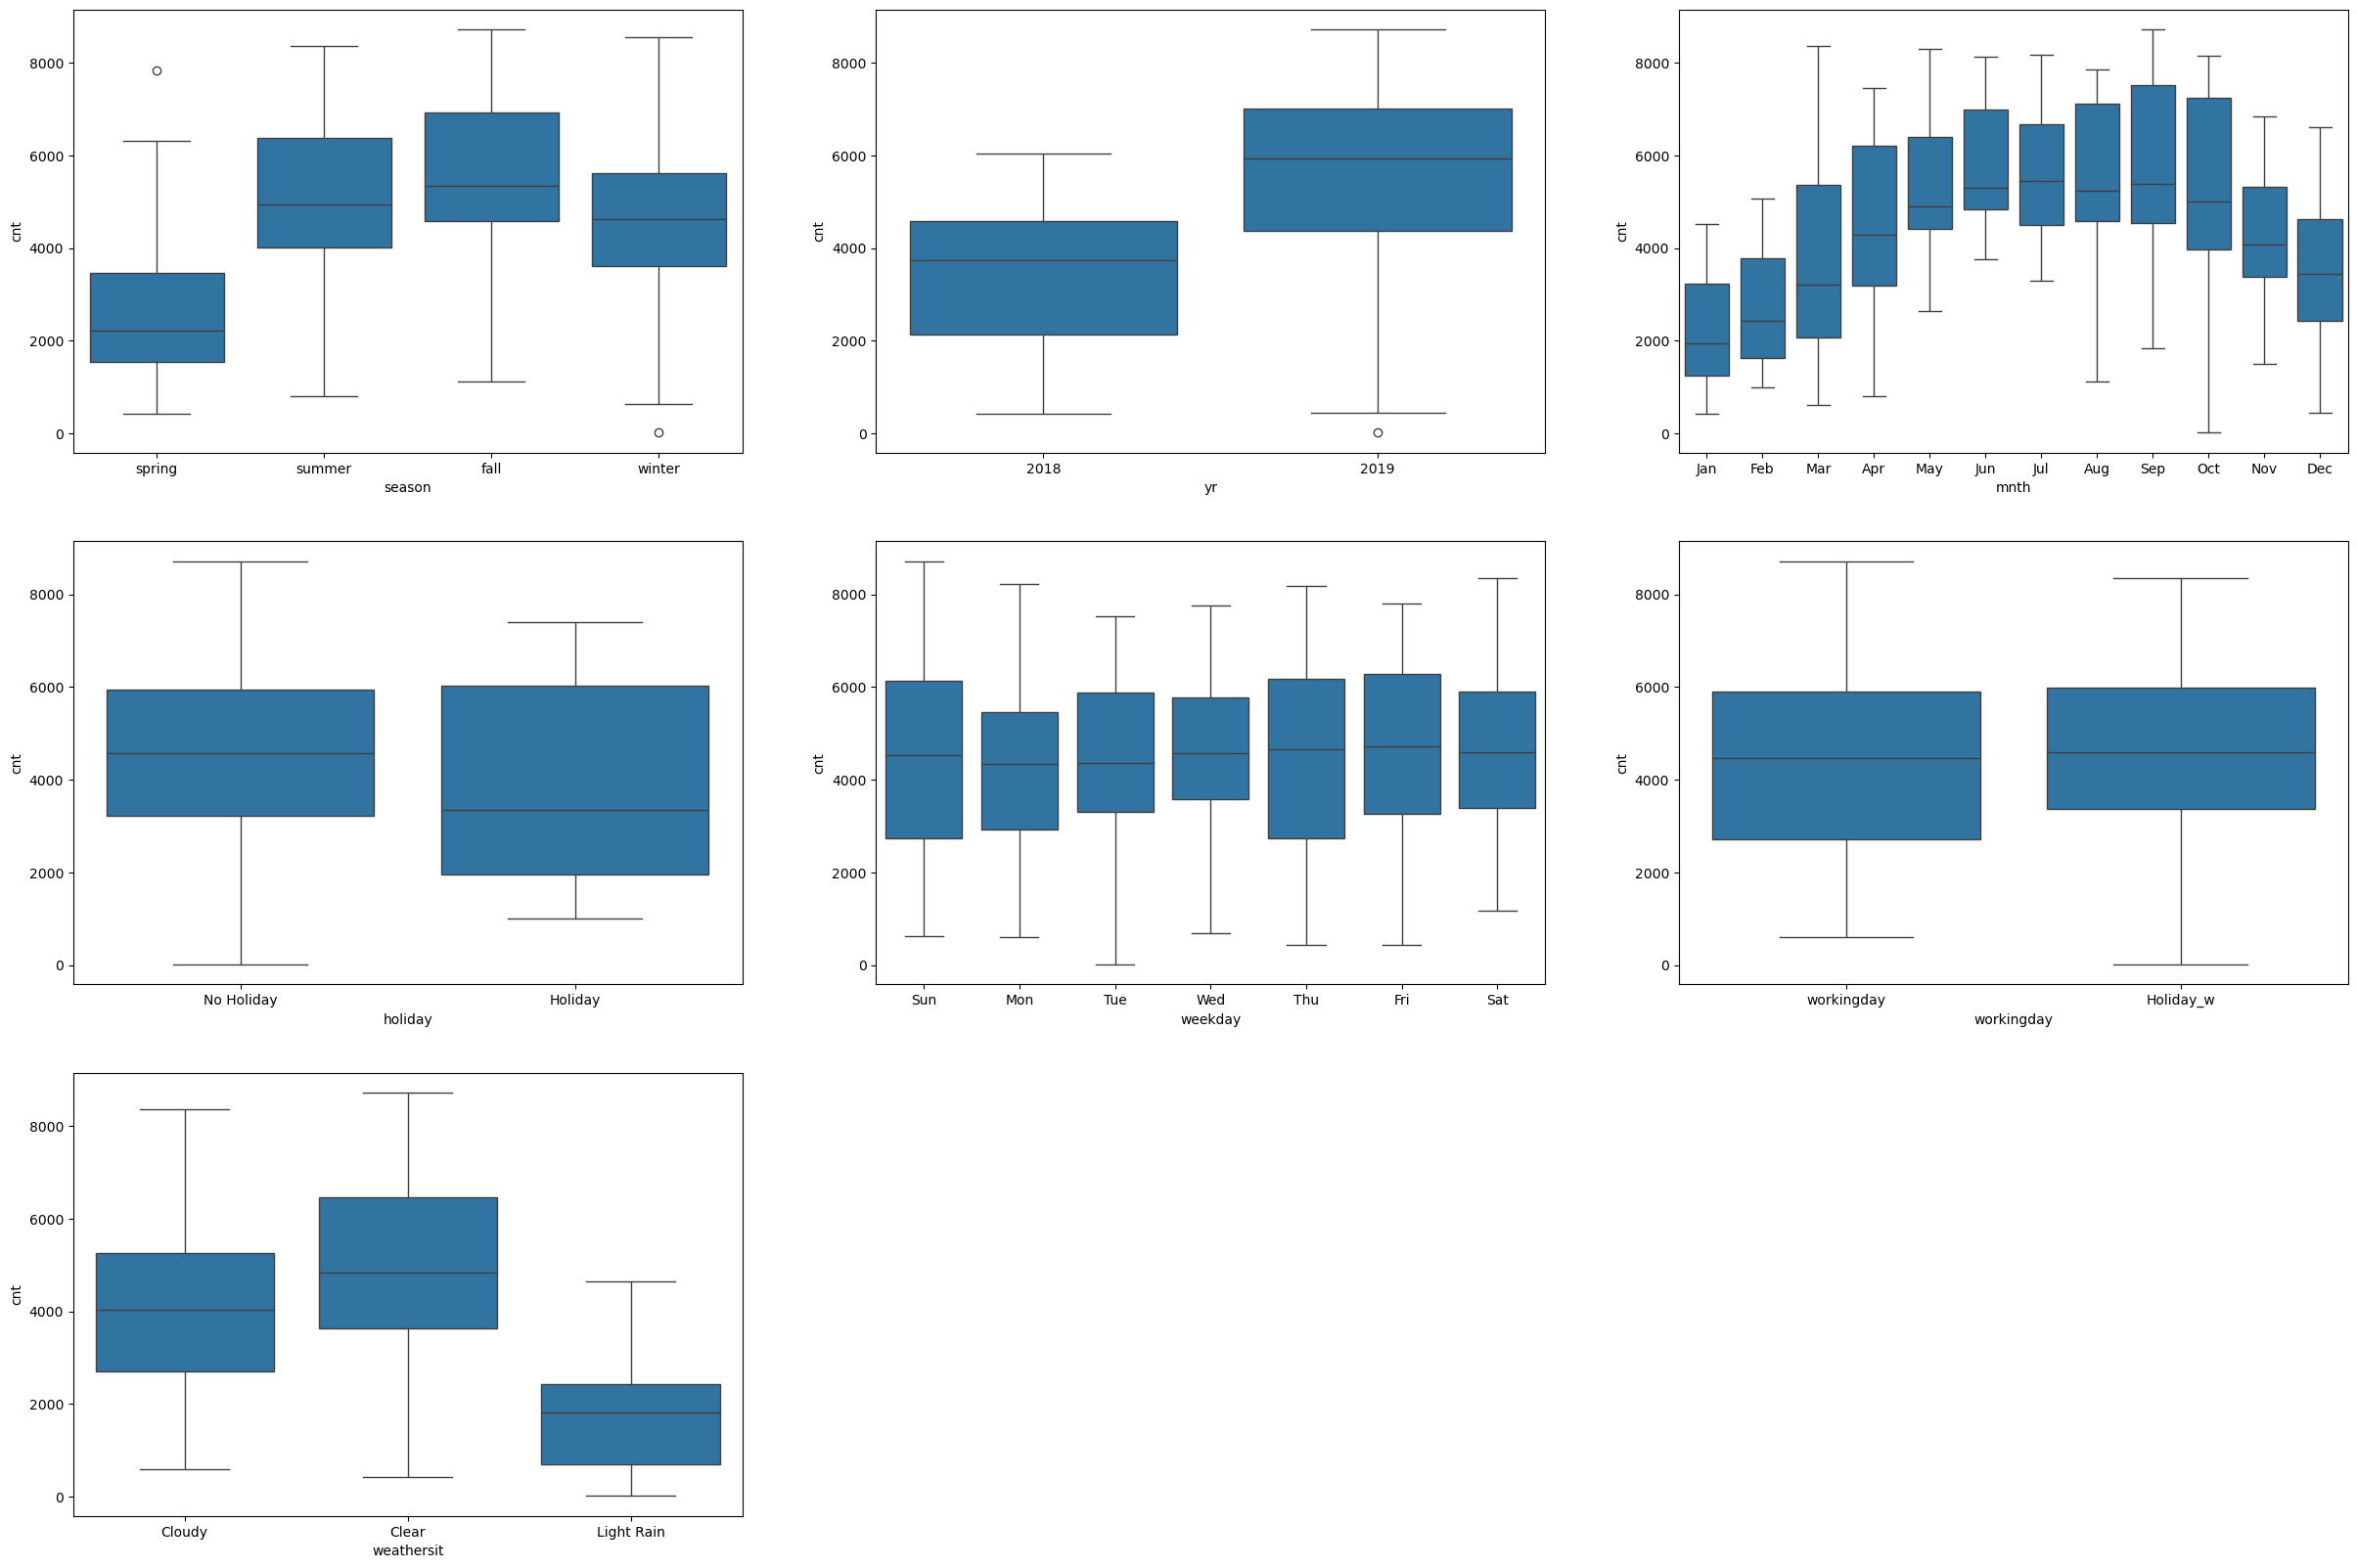

In [13]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize = (30,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'season' , y = 'cnt' , data = bike_new) 

plt.subplot(3,3,2)
sns.boxplot(x = 'yr' , y = 'cnt' , data = bike_new)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth' , y = 'cnt' , data = bike_new)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday' , y = 'cnt' , data = bike_new)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday' , y = 'cnt' , data = bike_new)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday' , y = 'cnt' , data = bike_new)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit' , y = 'cnt' , data = bike_new)
           

Insights¶
There were76 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for te dependen

t variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor forthe depende

nt variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be 

added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

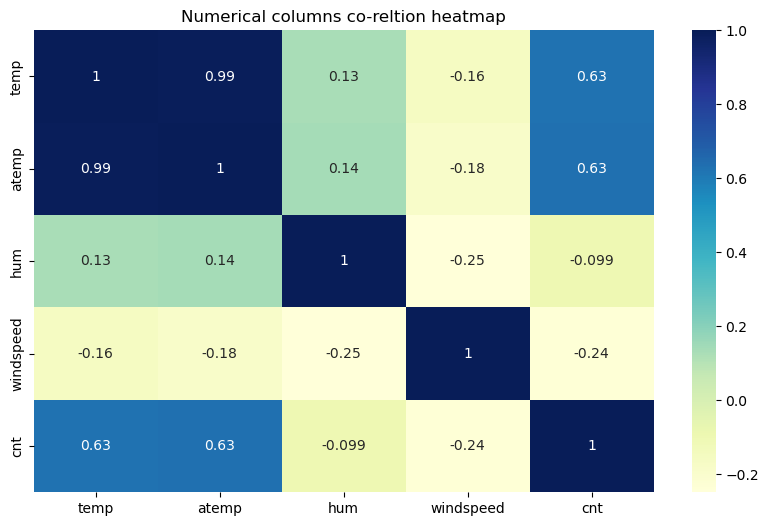

In [14]:
data = bike_new[["temp", "atemp", "hum",'windspeed','cnt']]
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()


In [15]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

status=pd.get_dummies(bike_new[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
status = status.astype(int)
status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [16]:
final=pd.concat([bike_new,status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thu,Holiday_w,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [17]:
final=final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# SPLITTING THE DATA

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for this

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
df_train,df_test = train_test_split(final, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Apply scaler() to all the numeric variables

scaler = MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars]) 
df_train.head()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.827658,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,1,1,0,...,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,1,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


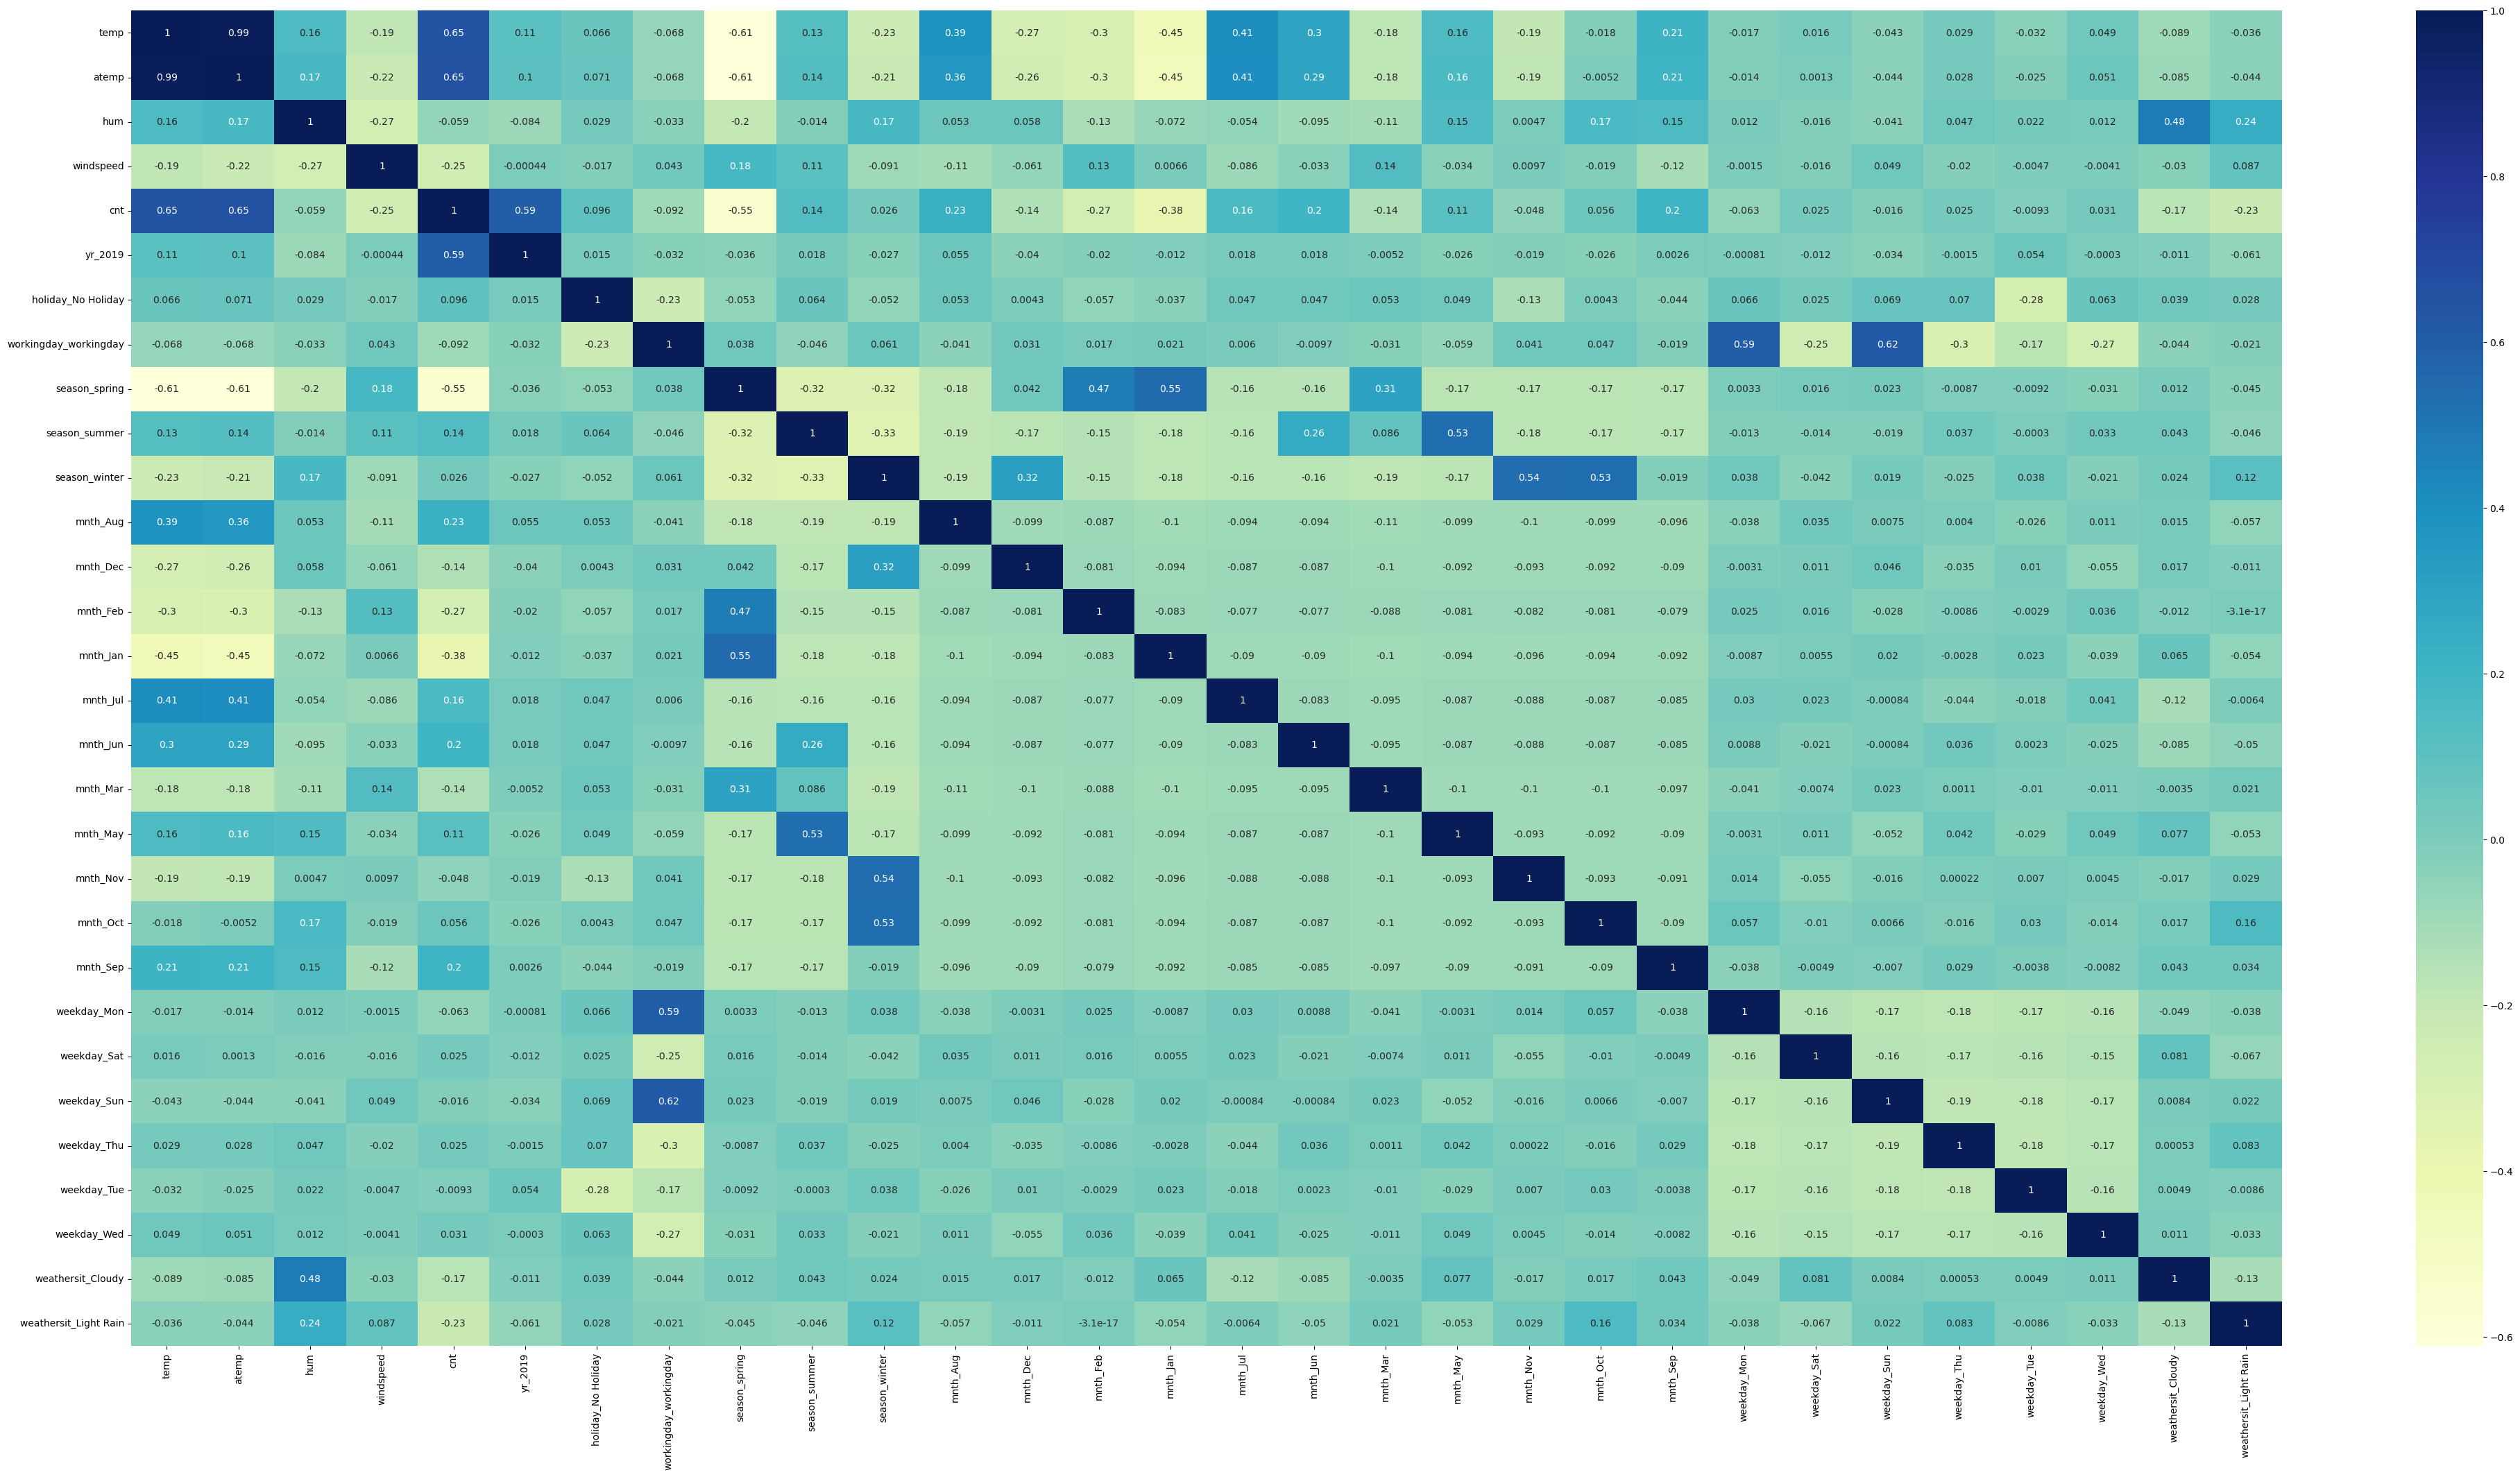

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

# BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [23]:
y_train=df_train.pop('cnt')
X_train=df_train

# RFE

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('holiday_No Holiday', True, 1),
 ('workingday_workingday', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'yr_2019', 'holiday_No Holiday',
       'workingday_workingday', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Sun',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'## 
Model 1

In [30]:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [31]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          4.22e-191
Time:                        14:24:37   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2371      0.044      5.432      0.000       0.151       0.323
temp                      0.5096      0.034     14.837      0.000       0.442       0.577
hum                      -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                -0.1863      0.025     -7.310      0.000      -0.236      -0.136
yr_2019                   0.2305      0.008     28.795      0.000       0.215       0.246
holiday_No Holiday        0.0582      0.027      2.164      0.031       0.005       0.111
workingday_workingday    -0.0433      0.012     -3.762      0.000      -0.066      -0.021
season_spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer             0.0508      0.015      3.423      0.001       0.022       0.080
season_winter             0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                 -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                  0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sun               0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
weathersit_Light Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF Check

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,123.31
7,season_spring,5.08
1,temp,3.89
9,season_winter,3.59
8,season_summer,2.65
2,hum,1.91
6,workingday_workingday,1.88
13,weekday_Sun,1.78
10,mnth_Jan,1.57
14,weathersit_Cloudy,1.57


In [35]:
# Removing the variable 'season_spring' based on its High VIF

X_train_new = X_train_rfe1.drop(["season_spring"], axis = 1)
X_train_new.head()

,const,temp,hum,windspeed,yr_2019,holiday_No Holiday,workingday_workingday,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain
576,1.0,0.815169,0.725633,0.264686,1,1,0,0,0,0,1,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,1,1,1,0,0,0,0,0,1,1,0
728,1.0,0.245101,0.498067,0.663106,1,1,1,0,0,0,0,0,0,0,0
482,1.0,0.395666,0.504508,0.188475,1,1,1,1,0,0,0,0,1,1,0
111,1.0,0.345824,0.751824,0.380981,0,1,0,1,0,0,0,0,0,1,0


In [36]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          5.98e-191
Time:                        14:24:37   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1852      0.038      4.820      0.000       0.110       0.261
temp                      0.5676      0.025     22.556      0.000       0.518       0.617
hum                      -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed                -0.1935      0.025     -7.606      0.000      -0.243      -0.144
yr_2019                   0.2294      0.008     28.555      0.000       0.214       0.245
holiday_No Holiday        0.0596      0.027      2.206      0.028       0.007       0.113
workingday_workingday    -0.0437      0.012     -3.774      0.000      -0.066      -0.021
season_summer             0.0757      0.011      6.950      0.000       0.054       0.097
season_winter             0.1255      0.011     11.081      0.000       0.103       0.148
mnth_Jan                 -0.0393      0.017     -2.271      0.024      -0.073      -0.005
mnth_Jul                 -0.0442      0.018     -2.486      0.013      -0.079      -0.009
mnth_Sep                  0.0928      0.016      5.847      0.000       0.062       0.124
weekday_Sun               0.0539      0.015      3.696      0.000       0.025       0.082
weathersit_Cloudy        -0.0541      0.010     -5.221      0.000      -0.075      -0.034
weathersit_Light Rain    -0.2433      0.026     -9.320      0.000      -0.295      -0.192
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.61
1,temp,2.07
2,hum,1.89
6,workingday_workingday,1.88
12,weekday_Sun,1.78
13,weathersit_Cloudy,1.56
9,mnth_Jan,1.55
8,season_winter,1.53
10,mnth_Jul,1.43
7,season_summer,1.41


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

const 0.18520.295	-0.192


temp  0.5676

hum	-0.1659

windspeed	-0.1935

yr_2019	0.2294

holiday_No Holiday	0.0596

workingday_workingday	-0.0437

season_summer	0.0757

season_winter	0.1255

mnth_Jan	-0.0393

mnth_Jul	-0.0442

mnth_Sep	0.0928

weekday_Sun	0.0539	

weathersit_Cloudy	-0.0541

weathersit_Light Rain	-0.2433

## The equation of best fitted surface based on MODEL

cnt =0.18523 + (yr*×0.22946)-+ (workingday*×0.04373) + (temp*× 0.5765) − (windspeed*×0.19351)-+ hum * 0.16596) + No Holiday * 0.05964) + summer * 0.07573) + winter * 0.1255)) − Jan * 0.03937) − Jul * 0.04422 + (Sep * 0.0928) + (Sun * 0.0539) - (Cloudy * 0.0541) - (Light Rain * 0.2433))

In [38]:
y_train_pred = lm.predict(X_train_sm)

<Axes: ylabel='Density'>

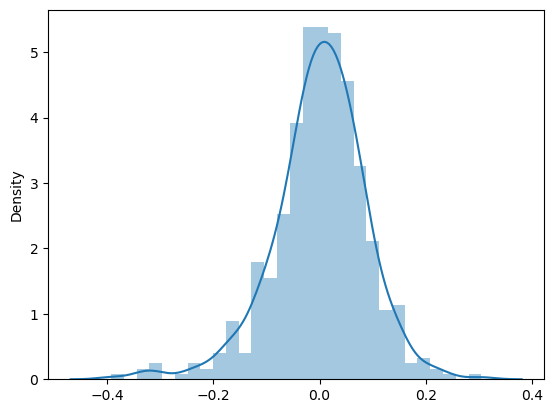

In [39]:
# Error terms are normally distributed with mean zero (not X, Y)

res = y_train - y_train_pred
sns.distplot(res)

In [40]:
# MAKING PREDICTION USING FINAL MODEl

In [41]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars]) 
df_test.head()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.481818,0.963636,0.300000,0.254545,0.263636,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.500809,0.187620,0.459303,0.436599,0.441609,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Dividing into X_test and y_test

y_test=df_test.pop('cnt')
X_test=df_test

In [44]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
X_test=X_test[col1]
X_test = X_test.drop(["season_spring"], axis = 1)

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,temp,hum,windspeed,yr_2019,holiday_No Holiday,workingday_workingday,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain
184,1.0,0.831783,0.657364,0.084219,0,0,1,0,0,0,1,0,0,1,0
535,1.0,0.901354,0.610133,0.153728,1,1,0,1,0,0,0,0,0,0,0
299,1.0,0.511964,0.837699,0.334206,0,1,0,0,1,0,0,0,0,1,0
221,1.0,0.881625,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,0
152,1.0,0.817246,0.314298,0.537414,0,1,0,1,0,0,0,0,0,0,0


In [45]:
# Making predictions using the final model
y_pred = lm.predict(X_test_sm)

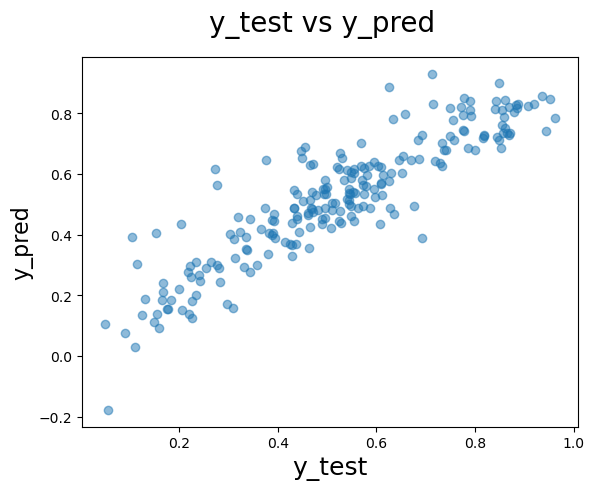

In [46]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [47]:
#R^2 Value for TEST

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805348463686337

In [48]:
# n is number of rows in X
r2 = 0.805348463686337
n = X_test_sm.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_sm.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.791035850722097

# Final Result Comparison

Train R^2 :0.846
Train Adjusted R^2 :0.421
Test R^2 :00520
Test Adjusted R^2 791812
This seems to be a really good model that can very well 'Generalize' various datasets.